In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pylab
import pprint


/Users/isabelaosorio/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [13]:
import scipy
df = pd.read_csv('winequality-red.csv')
df_std = df.copy(deep=True) #deep copy in order to run linear regression on raw data
measurements = df.describe()

#standardize dataset
for i in range(len(df_std.iloc[0])):
    for j in range(len(df_std.iloc[:,])):
        num = df_std.iloc[j,i] - measurements.iloc[1,i]
        std = num / measurements.iloc[2,i]
        df_std.iloc[j,i] = std

print(df) #raw
print(df_std) #standardized



      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5         

In [14]:
print(df.describe()) #ranges, mean, std deviation where taken from here

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [15]:
#correlation
print(df_std.corr()) 
print(df.corr())

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [16]:
#Split the data into training and testing sets
from sklearn.cross_validation import train_test_split
Red_std_Features = df_std[list(df_std.columns)[:-1]]
Red_std_Quality = df_std['quality']
Red_std_Features_train, Red_std_Features_test, Red_std_Quality_train, Red_std_Quality_test = train_test_split(Red_std_Features, Red_std_Quality)
#training standardized data

Red_Features = df[list(df.columns)[:-1]]
Red_Quality = df['quality']
Red_Features_train, Red_Features_test, Red_Quality_train, Red_Quality_test = train_test_split(Red_Features, Red_Quality)
#training raw data

In [17]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
  
    ols_model = sm.OLS(Red_Quality_test, Red_Features_test, missing='drop')
    ols_results = ols_model.fit()
    print(ols_results.summary())
    #raw data
    
    ols_std_model = sm.OLS(Red_std_Quality_test, Red_std_Features_test, missing='drop')
    ols_std_results = ols_std_model.fit()
    print(ols_std_results.summary())
    #standardized data

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     2913.
Date:                Wed, 02 May 2018   Prob (F-statistic):               0.00
Time:                        23:30:13   Log-Likelihood:                -378.97
No. Observations:                 400   AIC:                             779.9
Df Residuals:                     389   BIC:                             823.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity           -0.0322 

In [20]:
Quality_predictions = ols_results.predict(Red_Features_test)

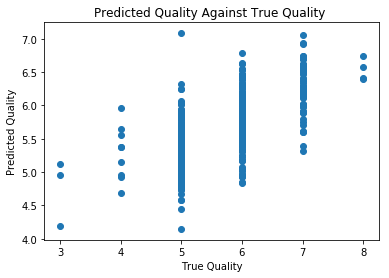

In [21]:
plt.scatter(Red_Quality_test, Quality_predictions)
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted Quality Against True Quality ')
plt.show()
#raw data predicted against tru

In [22]:
df2 = pd.read_csv('White Wine Qualities.csv')

measurements = df2.describe()

#only raw data for white wine since we decided from red that standardizing was not beneficial


In [23]:
print(df2.corr())


                      Unnamed: 0  fixed acidity  volatile acidity  \
Unnamed: 0              1.000000      -0.255814          0.002858   
fixed acidity          -0.255814       1.000000         -0.022697   
volatile acidity        0.002858      -0.022697          1.000000   
citric acid            -0.149900       0.289181         -0.149472   
residual sugar          0.006624       0.089021          0.064286   
chlorides              -0.045645       0.023086          0.070512   
free sulfur dioxide    -0.011929      -0.049396         -0.097012   
total sulfur dioxide   -0.161979       0.091070          0.089261   
density                -0.185976       0.265331          0.027114   
pH                     -0.115774      -0.425858         -0.031915   
sulphates               0.009808      -0.017143         -0.035728   
alcohol                 0.213656      -0.120881          0.067718   
quality                 0.035763      -0.113663         -0.194723   

                      citric acid

In [24]:
White_Features = df2[list(df.columns)[:-1]]
White_Quality = df2['quality']
White_Features_train, White_Features_test, White_Quality_train, White_Quality_test = train_test_split(White_Features, White_Quality)

In [25]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    white_results = sm.OLS(White_Quality_test, White_Features_test, missing='drop')
    white_results = white_results.fit()
    print(white_results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     6174.
Date:                Thu, 03 May 2018   Prob (F-statistic):               0.00
Time:                        00:29:59   Log-Likelihood:                -1442.9
No. Observations:                1225   AIC:                             2908.
Df Residuals:                    1214   BIC:                             2964.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity           -0.0260 

In [28]:
White_Quality_predictions = white_results.predict(White_Features_test)

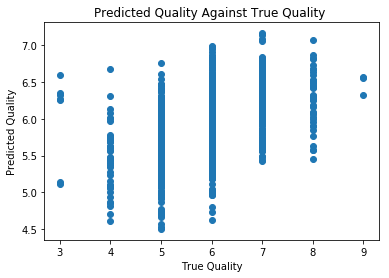

In [29]:
plt.scatter(White_Quality_test, White_Quality_predictions)
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted Quality Against True Quality ')
plt.show()